In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

seed=628

In [6]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [7]:
def load_and_split_data(file_path, test_size=0.2, random_state=seed):
  df = pd.read_csv(file_path)
  X_train, X_test, y_train, y_test = train_test_split(df[['text']], df['spam'], stratify=df['spam'], random_state=random_state)
  return X_train, X_test, y_train, y_test

In [23]:
def preprocess_text(text):
  text = text.lower()
  text = re.sub(r'[^a-zA-Z\s]', '', text)
  tokens = word_tokenize(text)

  tokens = [token for token in tokens if token not in stop_words]
  return ' '.join(tokens)

def extract_text_features(text):
  return {
      'text_length': len(text),
      'word_count': len(text.split()),
      'unique_words': len(set(text.split())),
      'caps_ratio': sum(1 for c in text if c.isupper()) / len(text) if len(text) > 0 else 0,
  }

  def prepare_features(texts, is_training=True):
    print(f"Preprocessing text data...")
    preprocessed_texts = texts['text'].apply(preprocess_text)
    features = pd.json_normalize(preprocessed_texts.apply(extract_text_features))


    if is_training:
      q_low = features['text_length'].quantile(0.01)
      q_high = features['text_length'].quantile(0.99)
      features['text_length'] = features['text_length'].clip(q_low, q_high)

      return preprocessed_texts, features

In [24]:
def create_model(X_test_train, X_features_train, y_train, max_features=5000):
  vectorizer = TfidfVectorizer(max_features=max_features)
  X_text_vectorized = vectorizer.fit_transform(X_text_train)

  scaler = StandardScaler()
  X_features_scaled = scaler.fit_transform(X_features_train)
  X_combined = np.hstack((X_text_vectorized.toarray(), X_features_scaled))

  smote = SMOTE(random_state=seed)
def create_model(X_test_train, X_features_train, y_train, max_features=5000):
  vectorizer = TfidfVectorizer(max_features=max_features)
  X_text_vectorized = vectorizer.fit_transform(X_test_train)

  scaler = StandardScaler()
  X_features_scaled = scaler.fit_transform(X_features_train)
  X_combined = np.hstack((X_text_vectorized.toarray(), X_features_scaled))

  smote = SMOTE(random_state=seed)
  X_resampled, y_resampled = smote.fit_resample(X_combined, y_train)

  model = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=seed, n_jobs=-1)
  model.fit(X_resampled, y_resampled)

  return model, vectorizer, scaler

def evaluate_model(model, vectorizer, scaler, X_text_test, X_features_test, y_test):
  X_test_vectorized = vectorizer.transform(X_text_test)
  X_features_scaled = scaler.transform(X_features_test)
  X_combined = np.hstack((X_test_vectorized.toarray(), X_features_scaled))
  y_pred = model.predict(X_combined)

def create_model(X_test_train, X_features_train, y_train, max_features=5000):
  vectorizer = TfidfVectorizer(max_features=max_features)
  X_text_vectorized = vectorizer.fit_transform(X_test_train)

  scaler = StandardScaler()
  X_features_scaled = scaler.fit_transform(X_features_train)
  X_combined = np.hstack((X_text_vectorized.toarray(), X_features_scaled))

  smote = SMOTE(random_state=seed)
  X_resampled, y_resampled = smote.fit_resample(X_combined, y_train)

  model = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=seed, n_jobs=-1)
  model.fit(X_resampled, y_resampled)

  return model, vectorizer, scaler

def evaluate_model(model, vectorizer, scaler, X_text_test, X_features_test, y_test):
  X_test_vectorized = vectorizer.transform(X_text_test)
  X_features_scaled = scaler.transform(X_features_test)
  X_combined = np.hstack((X_test_vectorized.toarray(), X_features_scaled))
  y_pred = model.predict(X_combined)

  print(f"\nClassification Report:\n")
  print(classification_report(y_test, y_pred))

  plt.figure(figsize=(8, 6))
  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.title('Confusion Matrix')
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

  return y_pred

In [26]:
X_train, X_test, y_train, y_test = load_and_split_data('/content/emails.csv')

X_text_train, X_features_train = prepare_features(X_train, is_training=True)
X_text_test, X_features_test = prepare_features(X_test, is_training=False)

NameError: name 'prepare_features' is not defined

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

!pip install nltk
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

seed=628


nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def load_and_split_data(file_path, test_size=0.2, random_state=seed):
  df = pd.read_csv(file_path)
  X_train, X_test, y_train, y_test = train_test_split(df[['text']], df['spam'], stratify=df['spam'], random_state=random_state)
  return X_train, X_test, y_train, y_test

def preprocess_text(text):
  text = text.lower()
  text = re.sub(r'[^a-zA-Z\s]', '', text)
  tokens = word_tokenize(text)

  tokens = [token for token in tokens if token not in stop_words]
  return ' '.join(tokens)

def extract_text_features(text):
  return {
      'text_length': len(text),
      'word_count': len(text.split()),
      'unique_words': len(set(text.split())),
      'caps_ratio': sum(1 for c in text if c.isupper()) / len(text) if len(text) > 0 else 0,
  }

# Move prepare_features outside of extract_text_features
def prepare_features(texts, is_training=True):
  print(f"Preprocessing text data...")
  preprocessed_texts = texts['text'].apply(preprocess_text)
  features = pd.json_normalize(preprocessed_texts.apply(extract_text_features))

  if is_training:
    q_low = features['text_length'].quantile(0.01)
    q_high = features['text_length'].quantile(0.99)
    features['text_length'] = features['text_length'].clip(q_low, q_high)

  return preprocessed_texts, features

def create_model(X_test_train, X_features_train, y_train, max_features=5000):
  vectorizer = TfidfVectorizer(max_features=max_features)
  X_text_vectorized = vectorizer.fit_transform(X_test_train)

  scaler = StandardScaler()
  X_features_scaled = scaler.fit_transform(X_features_train)
  X_combined = np.hstack((X_text_vectorized.toarray(), X_features_scaled))

  smote = SMOTE(random_state=seed)
  X_resampled, y_resampled = smote.fit_resample(X_combined, y_train)

  model = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=seed, n_jobs=-1)
  model.fit(X_resampled, y_resampled)

  return model, vectorizer, scaler

def evaluate_model(model, vectorizer, scaler, X_text_test, X_features_test, y_test):
  X_test_vectorized = vectorizer.transform(X_text_test)
  X_features_scaled = scaler.transform(X_features_test)
  X_combined = np.hstack((X_test_vectorized.toarray(), X_features_scaled))
  y_pred = model.predict(X_combined)

  print(f"\nClassification Report:\n")
  print(classification_report(y_test, y_pred))

  plt.figure(figsize=(8, 6))
  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.title('Confusion Matrix')
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

  return y_pred

X_train, X_test, y_train, y_test = load_and_split_data('/content/emails.csv')

X_text_train, X_features_train = prepare_features(X_train, is_training=True)
X_text_test, X_features_test = prepare_features(X_test, is_training=False) #Fixed typo here, should be X_text_test

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Preprocessing text data...
Preprocessing text data...


In [35]:
model, vectorizer, scaler = create_model(X_text_train, X_features_train, y_train)


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1090
           1       0.92      0.99      0.95       342

    accuracy                           0.98      1432
   macro avg       0.96      0.98      0.97      1432
weighted avg       0.98      0.98      0.98      1432



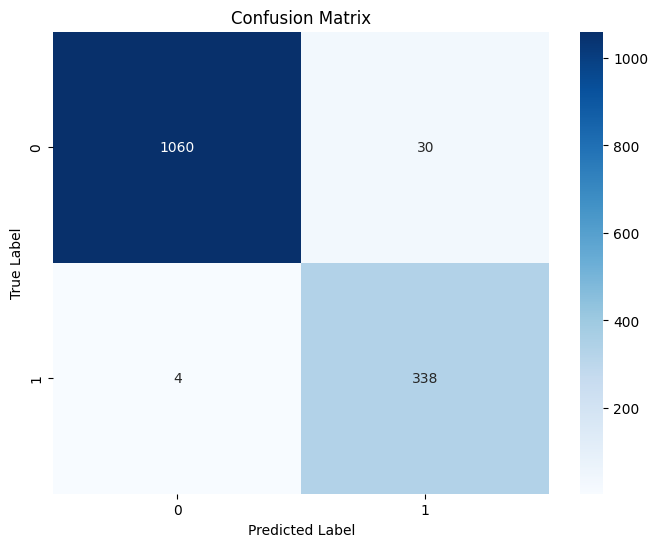

In [36]:
predictions = evaluate_model(model, vectorizer, scaler, X_text_test, X_features_test, y_test)